# MNIST classification with kNN classifier

## 1. Load MNIST dataset and prepare data

I use pandas to read data from .csv files and to process it easily.

In [1]:
import numpy as np
import pandas as pd

In [2]:
mnist_train_full = pd.read_csv('mnist_train.csv')
mnist_test_full = pd.read_csv('mnist_test.csv')

To speed up the calculations, I use 20\% of the full dataset only (12000 images in training data and 200 images in test data). The next subsample is randomly selected.

In [3]:
part = 0.2
mnist_train = mnist_train_full.sample(int(len(mnist_train_full)*part))
mnist_test = mnist_test_full.sample(int(len(mnist_test_full)*part))

In [4]:
mnist_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
42201,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56336,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12163,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3938,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13707,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24532,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35520,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43187,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35509,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mnist_test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
4616,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1951,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2759,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6496,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3019,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3269,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7310,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9419,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
imsize = 28

The next code lines break down the dataset into images and their labels.

In [7]:
def get_data(dataset):
    return dataset[['%dx%d' % (i+1, j+1) for i in range(imsize) for j in range(imsize)]]

In [8]:
def get_labels(dataset):
    return dataset['label']

In [9]:
mnist_train_data = get_data(mnist_train)
mnist_train_labels = get_labels(mnist_train)

In [10]:
print(mnist_train_data)
print(mnist_train_labels)

       1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
42201    0    0    0    0    0    0    0    0    0     0  ...      0      0   
56336    0    0    0    0    0    0    0    0    0     0  ...      0      0   
12163    0    0    0    0    0    0    0    0    0     0  ...      0      0   
3938     0    0    0    0    0    0    0    0    0     0  ...      0      0   
13707    0    0    0    0    0    0    0    0    0     0  ...      0      0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
24532    0    0    0    0    0    0    0    0    0     0  ...      0      0   
35520    0    0    0    0    0    0    0    0    0     0  ...      0      0   
43187    0    0    0    0    0    0    0    0    0     0  ...      0      0   
35509    0    0    0    0    0    0    0    0    0     0  ...      0      0   
28230    0    0    0    0    0    0    0    0    0     0  ...      0      0   

       28x21  28x22  28x23  28x24  28x25  28x26  28

In [11]:
mnist_test_data = get_data(mnist_test)
mnist_test_labels = get_labels(mnist_test)

## 2. kNN classifier implementation

Here I present my knn classifier.

In [12]:
import sklearn
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances

In [13]:
class KNeighborsClassifier:
    
    def __init__(self, nclasses=10, n_neighbors=3, metric=euclidean_distances):
        self.nclasses = nclasses
        self.k = n_neighbors
        self.metric = metric
        
    def fit(self, train_data, labels):
        self.train_data = train_data
        self.labels = labels
        
    def predict_proba(self, test_data):
        labels = self._get_neighbours_labels(test_data)
        prediction = np.array([[len(np.where(k_labels == i)[0])/self.k for i in range(self.nclasses)]\
                               for k_labels in labels], dtype=np.float64)
        return prediction
                
    def predict(self, test_data):
        return np.argmax(self.predict_proba(test_data), axis=-1)
    
    def _get_neighbours_labels(self, test_data):
        distances = self.metric(test_data.values, self.train_data.values)
        neighbours = np.array([sorted(range(len(self.train_data)), key=lambda ind: distances[test_ind, ind])\
                      for test_ind in range(len(test_data))])[:, :self.k]
        return np.vectorize(lambda ind: self.labels.iloc[ind])(neighbours)


## 3. Check correctness (compare with exist implementations)

The knn classifier implementation above is correct because my knn classifier and knn classifier from sklearn shows the same results. Moreover, my classifier is faster.

In [25]:
import time

In [26]:
my_knn = KNeighborsClassifier(n_neighbors=3, metric=euclidean_distances)
my_knn.fit(mnist_train_data, mnist_train_labels)
my_knn_predict_proba = my_knn.predict_proba(mnist_test_data)

t = time.process_time()
my_knn_predict = my_knn.predict(mnist_test_data)
print("My knn time is %d sec" % (time.process_time() - t))

My knn time is 12 sec


In [27]:
from sklearn.neighbors import KNeighborsClassifier as SklearnKNeighborsClassifier

In [28]:
sklearn_knn = SklearnKNeighborsClassifier(n_neighbors=3, metric='euclidean')
sklearn_knn.fit(mnist_train_data, mnist_train_labels)
sklearn_knn_predict_proba = sklearn_knn.predict_proba(mnist_test_data)

t = time.process_time()
sklearn_knn_predict = sklearn_knn.predict(mnist_test_data)
print("Sklearn knn time is %d sec" % (time.process_time() - t))

Sklearn knn time is 20 sec


In [29]:
len(my_knn_predict_proba[np.where(my_knn_predict_proba != sklearn_knn_predict_proba)])

0

In [30]:
len(my_knn_predict[np.where(my_knn_predict != sklearn_knn_predict)])

0

## 4. Define features and distance functions

The following function calculates the forecast error.

In [15]:
def comp_error(predicted, labels):
    return len(np.where(predicted != labels)[0])/len(labels)

### 4.1. Some metrics

#### 4.1.1. L1 metric

L1 metric (or Manhattan metric) shows the forecast error of 5.75\%.

In [31]:
knn = KNeighborsClassifier(n_neighbors=5, metric=manhattan_distances)
knn.fit(mnist_train_data, mnist_train_labels)
comp_error(knn.predict(mnist_test_data), mnist_test_labels)

0.0575

#### 4.1.2. Euclidean Distance

L2 metric (or Euclidean metric) shows better result: the forecast error of 4.95\% (5\% is shown for the full dataset).

In [16]:
knn = KNeighborsClassifier(n_neighbors=5, metric=euclidean_distances)
knn.fit(mnist_train_data, mnist_train_labels)
comp_error(knn.predict(mnist_test_data), mnist_test_labels)

0.0495

#### 4.1.3. L3 metric

L3 metric gives the best result. However, it is very slow to calculate, so I will use Euclidean metric later.

In [94]:
knn = SklearnKNeighborsClassifier(n_neighbors=5, p=3)
knn.fit(mnist_train_data, mnist_train_labels)
comp_error(knn.predict(mnist_test_data), mnist_test_labels)

0.0475

### 4.2. Features

#### 4.2.1. Fourier transform

The knn classifier with L2 metric is known to give a good result with using of such features as deskewing, noise removal, bluring. I am interested in how the Fourier transform applying can affect the prediction of the method.

In [32]:
def get_image(data, row_index):
    return data.iloc[row_index].values.reshape(imsize, imsize)

In [33]:
def set_image(data, row_index, image):
    data.iloc[row_index] = image.flatten()

In [23]:
import matplotlib.pyplot as plt

In [34]:
def plot_image(image, vmin=0):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    im = ax.imshow(image, cmap="gray_r", vmin=vmin)
    fig.colorbar(im)

We can do the Fourier transform of an image and get two image constituents: the modulus and the angle. When we shift an image by some pixels, the angle changes only (it is shown below).

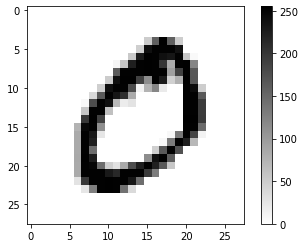

In [35]:
test_image = get_image(get_data(mnist_train_full), 1)
plot_image(test_image)

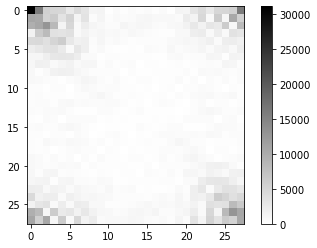

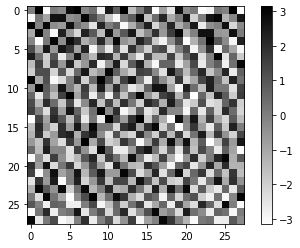

In [36]:
test_image_transf_abs = np.abs(np.fft.fft2(test_image))
plot_image(test_image_transf_abs)
test_image_transf_angle = np.angle(np.fft.fft2(test_image))
plot_image(test_image_transf_angle, vmin=None)

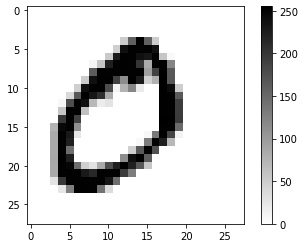

In [37]:
shifted_image = np.concatenate([test_image[:, 3:], test_image[:, :3]], axis=-1)
plot_image(shifted_image)

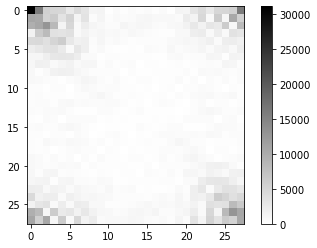

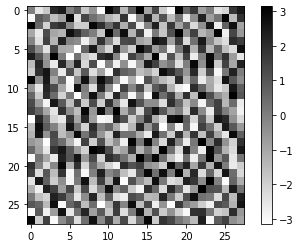

In [38]:
shifted_image_transf_abs = np.abs(np.fft.fft2(shifted_image))
plot_image(shifted_image_transf_abs)
shifted_image_transf_angle = np.angle(np.fft.fft2(shifted_image))
plot_image(shifted_image_transf_angle, vmin=None)

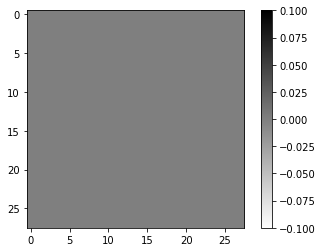

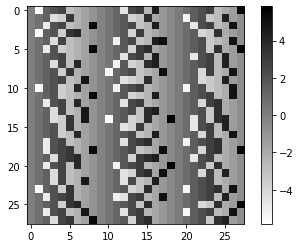

In [39]:
plot_image((shifted_image_transf_abs - test_image_transf_abs).astype(int))
plot_image(shifted_image_transf_angle - test_image_transf_angle, vmin=None)

The idea was to train the classifier using only the modulus of the Fourier image to achieve shift invariance. However, it gave the worse result (8.6\%). It was not surprising because the removal of the angle leads to the loss of some information. The Fourier transform in the raw did not give the error reduction too. I think it was due to the L2 metric that not suitable for the Fourier image.

In [40]:
import copy

In [41]:
def do_fourier_transform(data):
    new_data = copy.deepcopy(data)
    for row_ind in range(len(data)):
        image = get_image(data, row_ind)
        set_image(new_data, row_ind, np.abs(np.fft.fft2(image)))
    return new_data

In [42]:
mnist_train_data_transf = do_fourier_transform(mnist_train_data)
mnist_test_data_transf = do_fourier_transform(mnist_test_data)

In [43]:
knn = KNeighborsClassifier(n_neighbors=5, metric=euclidean_distances)
knn.fit(mnist_train_data_transf, mnist_train_labels)
comp_error(knn.predict(mnist_test_data_transf), mnist_test_labels)

0.0865

#### 4.2.2. Filtration

Fourier transform can be applyed for filtration of high frequencies. It looks as both noise removal and bluring.

In [44]:
def filter_image(image, nfreq = 8):
    filtered_image = np.fft.fft2(image)
    filtered_image[:, nfreq:imsize-nfreq] = 0.0+0.0j
    filtered_image[nfreq:imsize-nfreq, :nfreq] = 0.0+0.0j
    filtered_image[nfreq:imsize-nfreq, imsize-nfreq:] = 0.0+0.0j
    filtered_image = np.abs(np.fft.ifft2(filtered_image))
    return filtered_image / np.max(filtered_image)

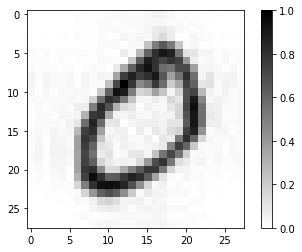

In [45]:
test_image_filtered = filter_image(test_image)
plot_image(test_image_filtered)

This showed a good result: the forecast error was decreased by 0.8\%.

In [46]:
def filter_dataset(data):
    new_data = pd.DataFrame({"%dx%d" % (i+1, j+1):np.zeros(shape=(len(data)), dtype=np.float64)\
                            for i in range(imsize) for j in range(imsize)})
    for row_ind in range(len(data)):
        image = get_image(data, row_ind)
        set_image(new_data, row_ind, filter_image(image))
    return new_data

In [47]:
mnist_train_data_filtered = filter_dataset(mnist_train_data)
mnist_test_data_filtered = filter_dataset(mnist_test_data)

In [48]:
knn = KNeighborsClassifier(n_neighbors=5, metric=euclidean_distances)
knn.fit(mnist_train_data_filtered, mnist_train_labels)
comp_error(knn.predict(mnist_test_data_filtered), mnist_test_labels)

0.0415

#### 4.2.3. Rotation

Some numbers in the dataset can be noticed to be slanted. The idea was to rotate them counterclock-wise. Because it is not known which of the images are slanted or straight, the dataset was expanded by all of the initial images that have been rotated. To smooth out artifacts received when rotating, the low-frequency filter was applyed.

In [49]:
def rotate_image(image, angle=np.pi/12.0):
    rotated_image = np.zeros(shape=(imsize, imsize), dtype=np.float64)
    for i in range(imsize):
        for j in range(imsize):
            i1 = int(np.cos(angle)*(i-imsize//2) - np.sin(angle)*(j-imsize//2)) + imsize//2
            j1 = int(np.sin(angle)*(i-imsize//2) + np.cos(angle)*(j-imsize//2)) + imsize//2
            if i1 > 0 and i1 < imsize and j1 > 0 and j1 < imsize:
                rotated_image[i1, j1] = image[i, j]
    return rotated_image      

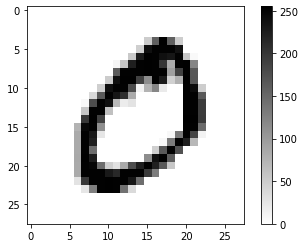

In [98]:
plot_image(test_image)

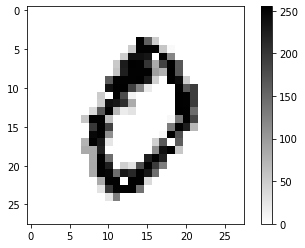

In [50]:
rotated_image = rotate_image(test_image)
plot_image(rotated_image)

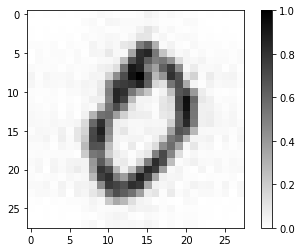

In [51]:
plot_image(filter_image(rotated_image))

In [52]:
def expand_dataset_rotated(data, labels):
    new_data = copy.deepcopy(data).append(copy.deepcopy(data))
    new_labels = copy.deepcopy(labels).append(copy.deepcopy(labels))
    for row_ind in range(len(data)):
        image = get_image(data, row_ind)
        set_image(new_data, row_ind + len(data), rotate_image(image))
    return new_data, new_labels

In [53]:
mnist_train_data_rotated, mnist_train_labels_rotated = expand_dataset_rotated(mnist_train_data, mnist_train_labels)
mnist_test_data_rotated, mnist_test_labels_rotated = expand_dataset_rotated(mnist_test_data, mnist_test_labels)

In [54]:
knn = KNeighborsClassifier(n_neighbors=5, metric=euclidean_distances)
knn.fit(mnist_train_data_rotated, mnist_train_labels_rotated)
comp_error(knn.predict(mnist_test_data_rotated), mnist_test_labels_rotated)

0.05075

In [55]:
mnist_train_data_filtered_rotated = filter_dataset(mnist_train_data_rotated)
mnist_test_data_filtered_rotated = filter_dataset(mnist_test_data_rotated)

In [56]:
knn = KNeighborsClassifier(n_neighbors=5, metric=euclidean_distances)
knn.fit(mnist_train_data_filtered_rotated, mnist_train_labels_rotated)
comp_error(knn.predict(mnist_test_data_filtered_rotated), mnist_test_labels_rotated)

0.04

We can see that the forecast error was decreased by 0.015\%. The best result is 4\% of error now.

#### 4.2.4. Deskewing

I tried to tranform images to be independent on shift and size by cropping image margins. It seemed a good idea but did not give any excellent result. For the initial dataset this allowed to win a couple of tenths of a percent, but combined with filtration and rotation the result got worse.

In [62]:
from PIL import Image

In [63]:
def deskew_image(image):
    arr_not_null = np.where(image != 0)
    top = np.min(arr_not_null[0])
    low = np.max(arr_not_null[0])
    left = np.min(arr_not_null[1])
    right = np.max(arr_not_null[1])
    return np.array(Image.fromarray(image.astype(np.int32)[top:low, left:right], mode='I').resize((imsize, imsize)),
                    dtype=image.dtype)

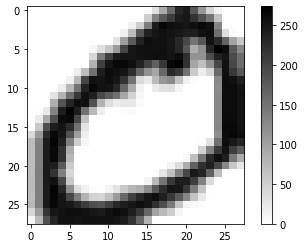

In [64]:
plot_image(deskew_image(test_image))

In [65]:
def deskew_dataset(data):
    new_data = copy.deepcopy(data)
    for row_ind in range(len(data)):
        image = get_image(data, row_ind)
        set_image(new_data, row_ind, deskew_image(image))
    return new_data

In [66]:
mnist_train_data_deskewied = deskew_dataset(mnist_train_data)
mnist_test_data_deskewied = deskew_dataset(mnist_test_data)

In [67]:
knn = KNeighborsClassifier(n_neighbors=5, metric=euclidean_distances)
knn.fit(mnist_train_data_deskewied, mnist_train_labels)
comp_error(knn.predict(mnist_test_data_deskewied), mnist_test_labels)

0.0475

In [70]:
mnist_train_data_deskewied_filtered = filter_dataset(mnist_train_data_deskewied)
mnist_test_data_deskewied_filtered = filter_dataset(mnist_test_data_deskewied)

In [71]:
knn = KNeighborsClassifier(n_neighbors=5, metric=euclidean_distances)
knn.fit(mnist_train_data_deskewied_filtered, mnist_train_labels)
comp_error(knn.predict(mnist_test_data_deskewied_filtered), mnist_test_labels)

0.0465

In [72]:
mnist_train_data_deskewied_filtered_rotated = filter_dataset(deskew_dataset(mnist_train_data_rotated))
mnist_test_data_deskewied_filtered_rotated = filter_dataset(deskew_dataset(mnist_test_data_rotated))

In [73]:
knn = KNeighborsClassifier(n_neighbors=5, metric=euclidean_distances)
knn.fit(mnist_train_data_deskewied_filtered_rotated, mnist_train_labels_rotated)
comp_error(knn.predict(mnist_test_data_deskewied_filtered_rotated), mnist_test_labels_rotated)

0.0425

#### 4.2.5. Shifts

Also I tried to expand the dataset by images shifted by 1 pixel. It did not give any positive result.

In [74]:
def shift_image_left(image, step=1):
    return np.concatenate([image[:, step:], image[:, :step]], axis=-1)

In [75]:
def shift_image_right(image, step=1):
    return np.concatenate([image[:, imsize-step:], image[:, :imsize-step]], axis=-1)

In [76]:
def expand_dataset_shifted(data, labels):
    new_data = copy.deepcopy(data)
    new_labels = copy.deepcopy(labels)
    for i in range(2):
        new_data = new_data.append(copy.deepcopy(data))
        new_labels = new_labels.append(copy.deepcopy(labels))
    for row_ind in range(len(data)):
        image = get_image(data, row_ind)
        set_image(new_data, row_ind + 1*len(data), shift_image_left(image))
        set_image(new_data, row_ind + 2*len(data), shift_image_right(image))
    return new_data, new_labels

In [77]:
mnist_train_data_shifted, mnist_train_labels_shifted = expand_dataset_shifted(mnist_train_data, mnist_train_labels)
mnist_test_data_shifted, mnist_test_labels_shifted = expand_dataset_shifted(mnist_test_data, mnist_test_labels)

In [78]:
knn = KNeighborsClassifier(n_neighbors=5, metric=euclidean_distances)
knn.fit(mnist_train_data_shifted, mnist_train_labels_shifted)
comp_error(knn.predict(mnist_test_data_shifted), mnist_test_labels_shifted)

0.049833333333333334

## 5. Find hyper-parameters

The experiments above were performed with the number of neighbors k=5 because it was the best hyperparameter for the dataset without any preprocessings and features. The code below demonstrates that it is the best parameter for the dataset with the constructed features. I did not consider the case of the number of neighbors equal to 1 because it is similar to degenerate case that can lead to overfitting. Also, the error steadily increases with the growth of k, that means the hyperpatameter to be small enough.

In [79]:
k_arr = [3, 5, 7, 10, 50, 100, 150]

In [80]:
error_arr = []
for k in k_arr:
    knn = KNeighborsClassifier(n_neighbors=k, metric=euclidean_distances)
    knn.fit(mnist_train_data, mnist_train_labels)
    error_arr.append(comp_error(knn.predict(mnist_test_data), mnist_test_labels))

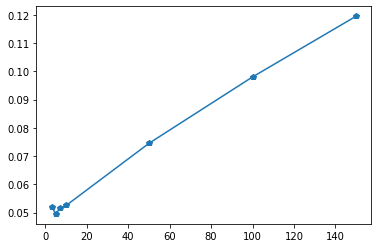

In [81]:
_ = plt.plot(k_arr, error_arr, '-p')

In [82]:
error_arr = []
for k in k_arr:
    knn = KNeighborsClassifier(n_neighbors=k, metric=euclidean_distances)
    knn.fit(mnist_train_data_filtered_rotated, mnist_train_labels_rotated)
    error_arr.append(comp_error(knn.predict(mnist_test_data_filtered_rotated), mnist_test_labels_rotated))

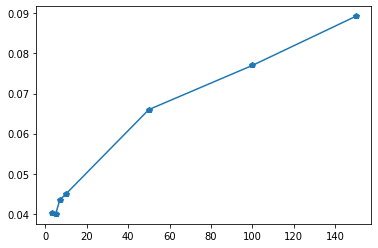

In [83]:
_ = plt.plot(k_arr, error_arr, '-p')

Let's compute the prediction, finally.

In [88]:
knn = KNeighborsClassifier(n_neighbors=5, metric=euclidean_distances)
knn.fit(mnist_train_data_filtered_rotated, mnist_train_labels_rotated)
prediction = knn.predict(mnist_test_data_filtered_rotated)[:len(mnist_test_labels)]

## 6. Results
### The best model parameters:
* k: 5
* Distance function: Euclidean
* Features: сutting high frequencies, rotation

### The best model test accuracy:
96.0\%

###  Why such model parameters are the best?
This is stated above.

By the way, it is interesting to see images for which the classifier made a mistake.

Prediction: 0, label: 6
Prediction: 9, label: 4
Prediction: 1, label: 7
Prediction: 7, label: 4
Prediction: 2, label: 7


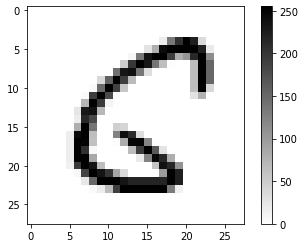

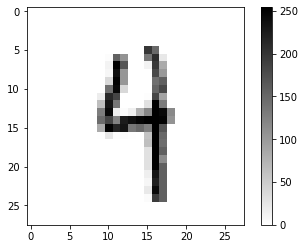

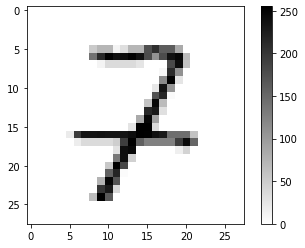

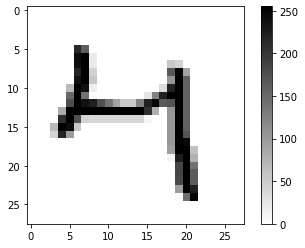

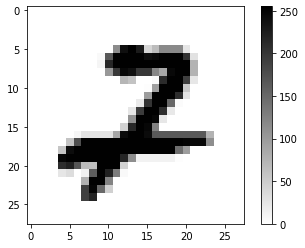

In [93]:
for i in range(5):
    index = np.where(prediction != mnist_test_labels)[0][i]
    plot_image(get_image(mnist_test_data, index))
    print("Prediction: %d, label: %d" % (prediction[index], mnist_test_labels.iloc[index]))

It is easy to see that some digits do look like the digits in the prediction. To get a much better result, we have to use better methods or build more tricky features, such as perhaps the presence of an open circuit at the top of the digit (see fig. 2 above) or the number of straight lines in the digit. Obviously, the Lp metric (in particular, L2) is not very suitable here.